# <font color=#a0a0ff>Shapefile Subset with CLIMCAPS L2 Data Using L2SS Running Locally

#### <font color=#a0a0ff>The following commands will get a copy of the L2SS code andinstall all the required Python packages. <br>It is only necessary to do these steps once. 

In [1]:
#!git clone https://github.com/podaac/l2ss-py
#!cd l2ss-py
#!pip install packaging>=21.3
#!pip install poetry
#!poetry install 

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: l2ss-py (1.5.0-alpha.0Installing the current project: l2ss-py (1.5.0-alpha.0)


In [2]:
from podaac.subsetter.subset import subset
import os
from shutil import copy
import netCDF4 as nc4
import numpy as np
import shapefile as shp
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

### <font color=#a0a0ff>Use the result from a previous variable subset as the input file

In [3]:
path='/home/jovyan/GESDISC/sub_global/'
f='SNDR.SNPP.CRIMSS.20151102T1718.m06.g174.L2_CLIMCAPS_RET.std.v02_28.G.200331153124_subsetted.nc4'
fp=path+f
fin='shp_input.nc'
fout='shp_output.nc'
copy(fp,fin)
if os.path.isfile(fout): 
    os.remove(fout)

#### <font color=#a0a0ff>Source of Brazil shapefile: 
https://data.humdata.org/dataset/f5f0648e-f085-4c85-8242-26bf6c942f40/resource/2f26be26-a081-4557-8572-58545cd70e9f/download/bra_adm_ibge_2020_shp.zip

In [4]:
fshp = '/home/jovyan/Shapefiles/bra_admbnda_adm0_ibge_2020.shp'

### <font color=#a0a0ff>Run the L2 subsetter by passing relevant arguments to the <code>subset()</code> module

In [5]:
subset(fin,
       None,        # this is where the Bounding Box info would be if this were a different demo
       fout,
       variables=['surf_air_temp','surf_air_temp_qc'],
       shapefile=fshp) 

/srv/conda/envs/notebook/lib/python3.9/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


array([[-68.1, -46.8],
       [-11.3,   4.9]])

In [6]:
!h5ls -r shp_test_output.nc

/                        Group
/atrack                  Dataset {33}
/lat                     Dataset {33, 30}
/lon                     Dataset {33, 30}
/obs_time_tai93          Dataset {33, 30}
/surf_air_temp           Dataset {33, 30}
/surf_air_temp_qc        Dataset {33, 30}
/xtrack                  Dataset {30}


### <font color=#a0a0ff>Open the subset file and apply the Quality Flags to the data

In [7]:
f = nc4.Dataset('shp_test_output.nc','r')
var  = f['surf_air_temp']
qflg = f['surf_air_temp_qc']   
lats = f['lat']
lons = f['lon']

# Quality flag meanings:
# 0=best  1=good  2=do_not_use
varQ = var[:]
qf = qflg[:]
np.place(varQ, qf>1, np.nan)

In [14]:
print(lats.shape,lons.shape)
varQ[0:10][0:10]

(33, 30) (33, 30)


masked_array(
  data=[[--, nan, 300.3652038574219, 300.9617004394531,
         302.7356262207031, 302.670166015625, nan, 302.52801513671875,
         303.7265319824219, 303.66387939453125, 304.60302734375, nan,
         304.30517578125, 304.2801818847656, 303.982666015625,
         303.82867431640625, nan, nan, 301.04071044921875,
         301.9984130859375, 301.93597412109375, 302.11907958984375,
         302.6703186035156, 302.8907775878906, 302.0836181640625,
         302.24725341796875, 303.47686767578125, 303.451904296875,
         304.78271484375, 305.8717041015625],
        [--, 301.85418701171875, 301.39813232421875, 301.76544189453125,
         302.871826171875, 305.1468200683594, nan, 304.6553649902344,
         304.67352294921875, 305.09527587890625, 305.54779052734375,
         304.7044677734375, 304.88275146484375, 304.7503662109375,
         304.50421142578125, nan, nan, nan, 300.9909973144531,
         301.8181457519531, nan, 302.7222900390625, 302.84417724609375,
      

In [15]:
def DrawColorbar(fig,ax,p,units):
    buf = 0.01 # space between right edge of plot and left edge of colorbar
    wid = 0.01 # width of colorbar
    pos = ax.get_position()
    cbx = pos.x1 + buf
    cby = pos.bounds[1]
    cbh = pos.bounds[3]
    cax = fig.add_axes([cbx, cby, wid, cbh])
    cb  = plt.colorbar(p, cax=cax)
    b = plt.title(units)

In [16]:
shapes = list(shpreader.Reader(fshp).geometries())

In [17]:
# Set the domain to the area around Brazil 




In [28]:
# Draw a scatter plot
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

In [29]:
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

In [ ]:
myExtent = [-74,-46,-15,13]    
ax.set_extent(myExtent)

In [ ]:
p = ax.scatter(lons[:], lats[:], c=varQ[:], cmap=plt.cm.Spectral_r, 
               marker='.', s=150, transform=ccrs.PlateCarree())

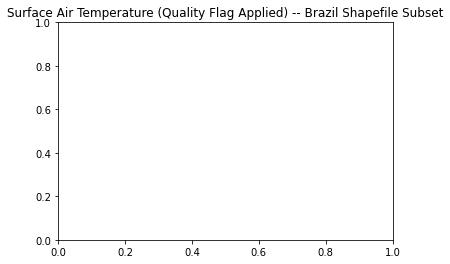

In [25]:
title = 'Surface Air Temperature (Quality Flag Applied) -- Brazil Shapefile Subset'
b = plt.title(title)

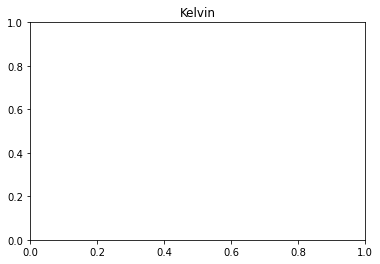

In [26]:
# Add coastlines, Brazil shapefile and gridlines
ax.coastlines(resolution="50m",linewidth=0.75)
ax.add_geometries(shapes, ccrs.PlateCarree(),edgecolor='blue',facecolor='none',alpha=0.7)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.8, color='#555555', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
DrawColorbar(fig,ax,p,'Kelvin')


In [27]:
f.close()